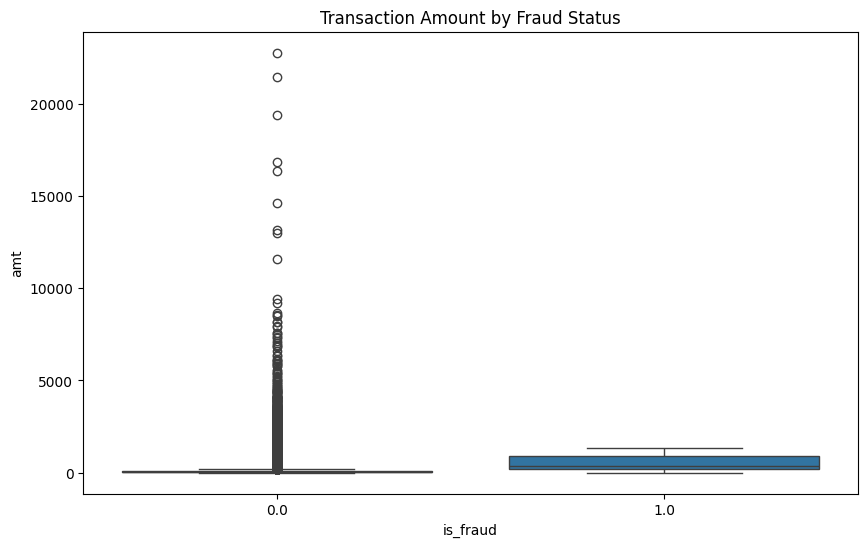

In [1]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from geopy.distance import geodesic
from sklearn.cluster import KMeans

train_df = pd.read_csv('./data/train.csv')

plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='is_fraud', y='amt')
plt.title('Transaction Amount by Fraud Status')
plt.show()


In [53]:
# Calculate the fraud rate by city
fraud_rate_by_city = train_df.groupby('city')['is_fraud'].mean().reset_index()
fraud_rate_by_city.rename(columns={'is_fraud': 'city_fraud_rate'}, inplace=True)

# Display the fraud rates for inspection
print(fraud_rate_by_city.sort_values(by='city_fraud_rate', ascending=False))


     city  city_fraud_rate
700   700              1.0
298   298              1.0
168   168              1.0
648   648              1.0
391   391              1.0
..    ...              ...
148   148              0.0
427   427              0.0
428   428              0.0
146   146              0.0
0       0              0.0

[849 rows x 2 columns]


In [54]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()
standardscaler = StandardScaler()

# Scale the city fraud rates to a 0-1 range
fraud_rate_by_city['normalized_city_fraud_rate'] = standardscaler.fit_transform(fraud_rate_by_city[['city_fraud_rate']])
#fraud_rate_by_city['scaled_city_fraud_rate'] = standardcaler.fit_transform(fraud_rate_by_city[['normalized_city_fraud_rate']])

# Check the scaled fraud rates
print(fraud_rate_by_city.sort_values(by='normalized_city_fraud_rate', ascending=False))


     city  city_fraud_rate  normalized_city_fraud_rate
700   700              1.0                    7.984694
298   298              1.0                    7.984694
168   168              1.0                    7.984694
648   648              1.0                    7.984694
391   391              1.0                    7.984694
..    ...              ...                         ...
148   148              0.0                   -0.164157
427   427              0.0                   -0.164157
428   428              0.0                   -0.164157
146   146              0.0                   -0.164157
0       0              0.0                   -0.164157

[849 rows x 3 columns]


In [55]:
print(fraud_rate_by_city.describe())

             city  city_fraud_rate  normalized_city_fraud_rate
count  849.000000       849.000000                8.490000e+02
mean   424.000000         0.020145                2.510752e-17
std    245.229484         0.122789                1.000589e+00
min      0.000000         0.000000               -1.641571e-01
25%    212.000000         0.000000               -1.641571e-01
50%    424.000000         0.000000               -1.641571e-01
75%    636.000000         0.002519               -1.436310e-01
max    848.000000         1.000000                7.984694e+00


In [45]:
# Determine the threshold for high fraud risk categories
threshold = fraud_rate_by_city['normalized_city_fraud_rate'].quantile(0.75)
print(fraud_rate_by_city.describe())
# Identify high fraud risk categories
high_risk_categories = fraud_rate_by_city[fraud_rate_by_city['normalized_city_fraud_rate'] >= threshold]['city']

# Display high-risk categories
print(high_risk_categories)


             city  city_fraud_rate  normalized_city_fraud_rate
count  849.000000       849.000000                  849.000000
mean   424.000000         0.020145                    0.020145
std    245.229484         0.122789                    0.122789
min      0.000000         0.000000                    0.000000
25%    212.000000         0.000000                    0.000000
50%    424.000000         0.000000                    0.000000
75%    636.000000         0.002519                    0.002519
max    848.000000         1.000000                    1.000000
2        2
3        3
4        4
11      11
22      22
      ... 
831    831
833    833
837    837
845    845
848    848
Name: city, Length: 213, dtype: int64


In [35]:
import pandas as pd

# Assuming train_df is your DataFrame loaded with transaction data
# Ensure 'is_fraud' is treated as a categorical variable for accurate calculations
#train_df['is_fraud'] = train_df['is_fraud'].astype(int)

# Calculate the fraud rate by category
fraud_rate_by_category = train_df.groupby('category')['is_fraud'].mean().reset_index()
fraud_rate_by_category.rename(columns={'is_fraud': 'fraud_rate'}, inplace=True)

# Display the fraud rate for inspection
print(fraud_rate_by_category.sort_values(by='fraud_rate', ascending=False))

# Determine the threshold for high fraud risk categories
threshold = fraud_rate_by_category['fraud_rate'].quantile(0.75)

# Identify high fraud risk categories
high_risk_categories = fraud_rate_by_category[fraud_rate_by_category['fraud_rate'] >= threshold]['category']

# Display high-risk categories
print(high_risk_categories)



    category  fraud_rate
11        11    0.012169
8          8    0.010044
4          4    0.009204
12        12    0.004199
2          2    0.002719
13        13    0.002488
3          3    0.002229
9          9    0.002215
10        10    0.001711
5          5    0.001408
0          0    0.001362
1          1    0.001283
7          7    0.001269
6          6    0.001267
4      4
8      8
11    11
12    12
Name: category, dtype: int64


In [37]:
# Calculate the fraud rate by merchant
fraud_rate_by_merchant = train_df.groupby('merchant')['is_fraud'].mean().reset_index()
fraud_rate_by_merchant.rename(columns={'is_fraud': 'fraud_rate'}, inplace=True)

# Display the fraud rate for inspection
print(fraud_rate_by_merchant.sort_values(by='fraud_rate', ascending=False).info())

# Determine the merch_threshold for high fraud risk categories
merch_threshold = fraud_rate_by_merchant['fraud_rate'].quantile(0.75)

# Identify high fraud risk categories
high_risk_merchants = fraud_rate_by_merchant[fraud_rate_by_merchant['fraud_rate'] >= merch_threshold]['merchant']

# Display high-risk merchants
print(high_risk_merchants.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 693 entries, 523 to 0
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   merchant    693 non-null    int64  
 1   fraud_rate  693 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 16.2 KB
None
(174,)


In [2]:
fraud_df = train_df[train_df['is_fraud'] == 1]
normal_df = train_df[train_df['is_fraud'] == 0]

In [3]:
print(fraud_df['amt'].describe())
print(normal_df['amt'].describe())

count    1877.000000
mean      530.272611
std       392.915401
min         1.780000
25%       216.250000
50%       379.570000
75%       907.770000
max      1320.920000
Name: amt, dtype: float64
count    484377.000000
mean         67.495988
std         151.963785
min           1.000000
25%           9.590000
50%          47.120000
75%          82.540000
max       22768.110000
Name: amt, dtype: float64


In [4]:
print(fraud_df['category'].describe())
print(normal_df['category'].describe())

count             1877
unique              14
top       shopping_net
freq               445
Name: category, dtype: object
count            484377
unique               14
top       gas_transport
freq              49146
Name: category, dtype: object


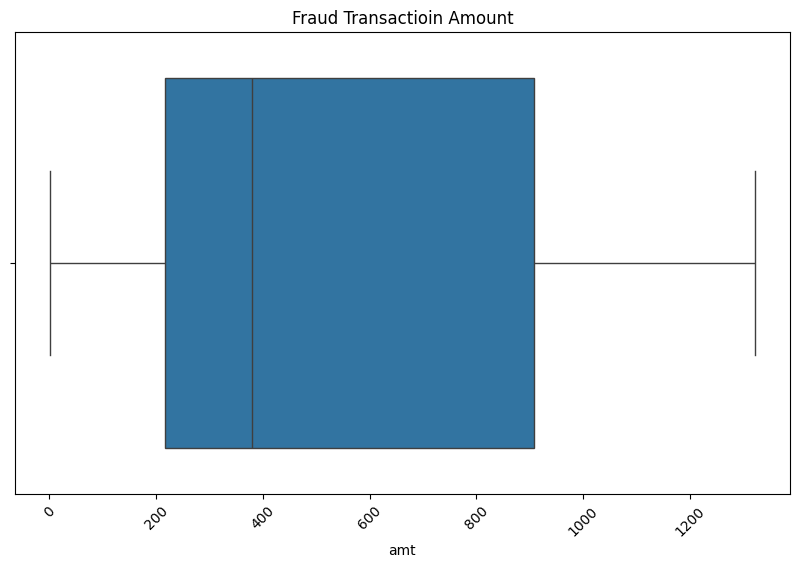

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=fraud_df, x='amt')
plt.title('Fraud Transactioin Amount')
plt.xticks(rotation=45)
plt.show()

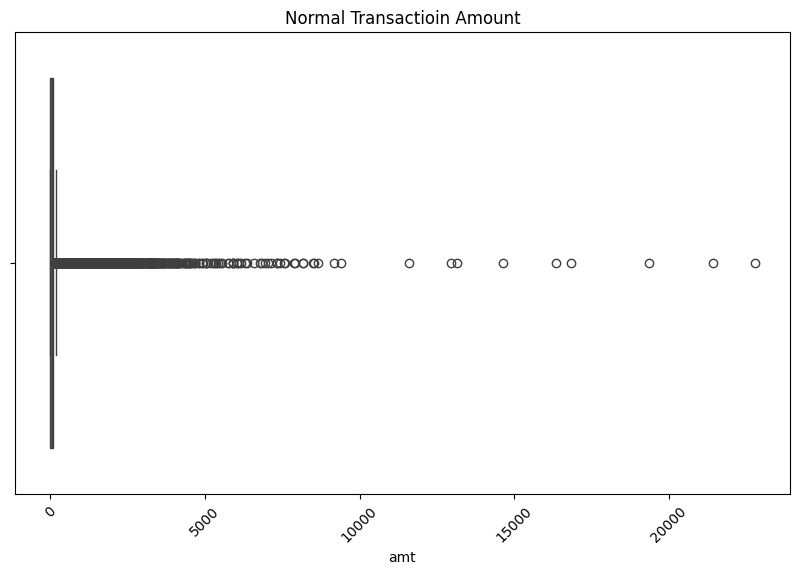

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=normal_df, x='amt')
plt.title('Normal Transactioin Amount')
plt.xticks(rotation=45)
plt.show()

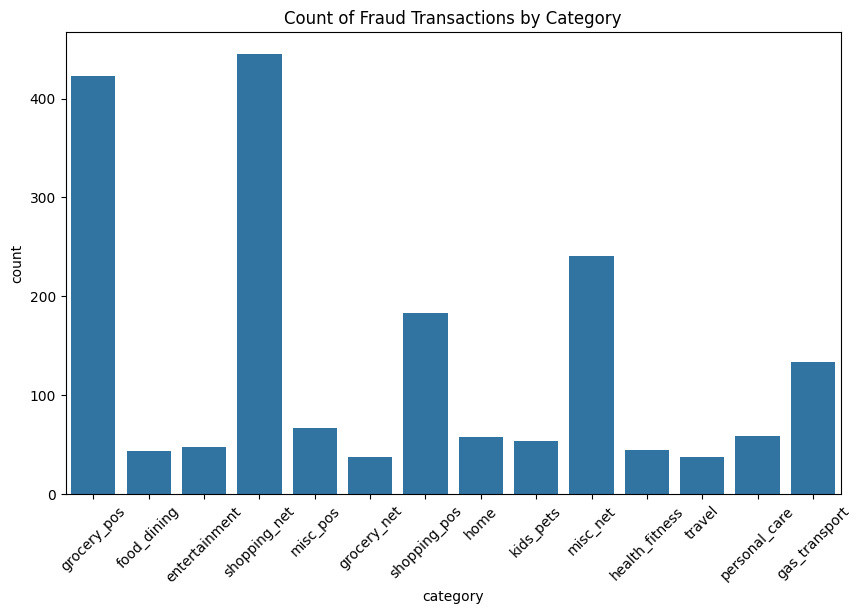

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud_df, x='category')
plt.title('Count of Fraud Transactions by Category')
plt.xticks(rotation=45)
plt.show()

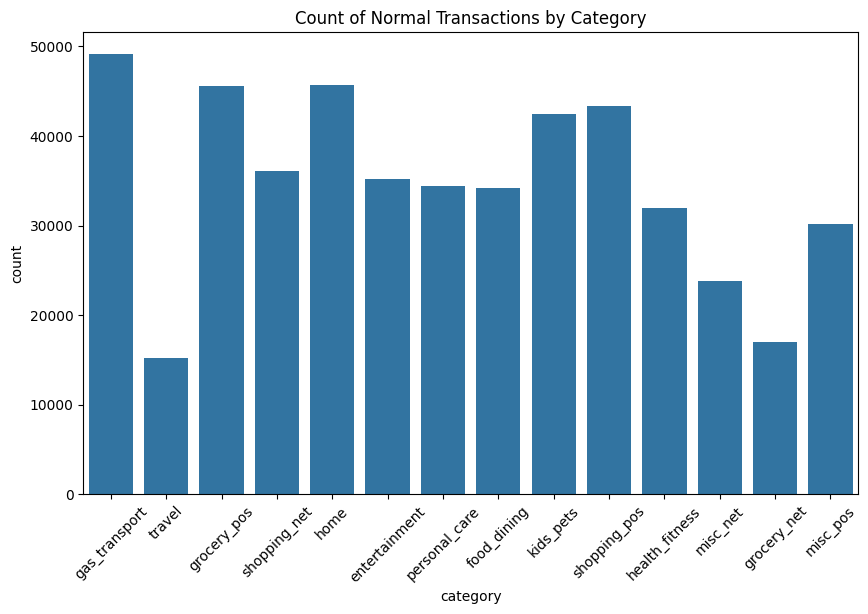

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=normal_df, x='category')
plt.title('Count of Normal Transactions by Category')
plt.xticks(rotation=45)
plt.show()

In [22]:
print(fraud_df['city_pop_cluster'].describe())
print(normal_df['city_pop_cluster'].describe())

count    1877.000000
mean        0.244006
std         0.853391
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: city_pop_cluster, dtype: float64
count    484377.000000
mean          0.337807
std           0.977859
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: city_pop_cluster, dtype: float64


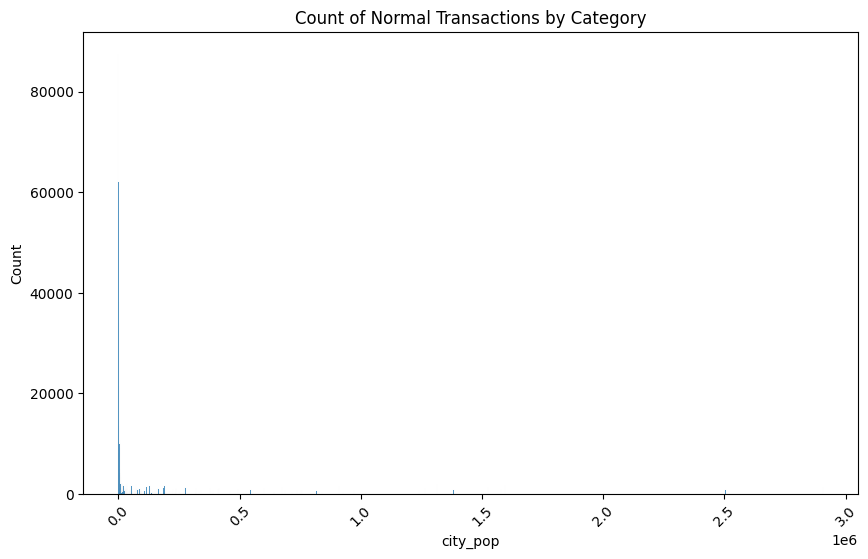

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=normal_df, x='city_pop')
plt.title('Count of Normal Transactions by Category')
plt.xticks(rotation=45)
plt.show()

In [58]:
print(fraud_df['cc_num'].describe())
print(normal_df['cc_num'].describe())

count    1.877000e+03
mean     4.004572e+17
std      1.298177e+18
min      6.048700e+10
25%      3.801440e+13
50%      2.454080e+15
75%      4.412720e+15
max      4.989850e+18
Name: cc_num, dtype: float64
count    4.843770e+05
mean     4.175060e+17
std      1.309315e+18
min      6.041621e+10
25%      1.800430e+14
50%      3.521420e+15
75%      4.635330e+15
max      4.992350e+18
Name: cc_num, dtype: float64


In [11]:
print(fraud_df['trans_date_trans_time'])

343       13/08/2020 22:55
507       10/07/2020 23:09
1122      12/12/2020 23:39
1633      25/08/2020 13:29
3031      10/11/2020 23:20
                ...       
484756    04/10/2020 22:58
484940    14/11/2020 05:34
485502    27/09/2020 22:49
485725    14/11/2020 22:07
486245    16/08/2020 03:47
Name: trans_date_trans_time, Length: 1877, dtype: object


In [59]:
# Separate the transactions
fraud_trans = train_df[train_df['is_fraud'] == 1]['amt']
normal_trans = train_df[train_df['is_fraud'] == 0]['amt']

# Calculate statistics
fraud_mean, fraud_std = fraud_trans.mean(), fraud_trans.std()
normal_mean, normal_std = normal_trans.mean(), normal_trans.std()

def calculate_similarity_score(amount, fraud_mean, fraud_std, normal_mean, normal_std):
    # Calculate Z-scores for fraud and normal
    z_score_fraud = abs((amount - fraud_mean) / fraud_std)
    z_score_normal = abs((amount - normal_mean) / normal_std)
    
    # Invert the Z-scores to get similarity scores (lower means more similar)
    fraud_similarity = 1 / (1 + z_score_fraud)
    normal_similarity = 1 / (1 + z_score_normal)
    
    return fraud_similarity, normal_similarity

# Vectorize the function for efficient DataFrame application
import numpy as np

v_calculate_similarity_score = np.vectorize(calculate_similarity_score)

# Apply the function
train_df['fraud_similarity'], train_df['normal_similarity'] = v_calculate_similarity_score(
    train_df['amt'],
    fraud_mean, fraud_std,
    normal_mean, normal_std
)

# Display the results
print(train_df[['amt', 'fraud_similarity', 'normal_similarity']].head(20))

        amt  fraud_similarity  normal_similarity
0     72.18          0.461706           0.970098
1     36.66          0.443207           0.831313
2      1.74          0.426411           0.697979
3    140.99          0.502322           0.674023
4   1722.19          0.247922           0.084113
5     34.08          0.441921           0.819743
6     50.20          0.450081           0.897814
7      3.32          0.427143           0.703081
8      5.47          0.428144           0.710145
9      1.23          0.426175           0.696348
10     2.12          0.426587           0.699199
11   121.05          0.489835           0.739419
12     3.09          0.427036           0.702334
13   112.12          0.484442           0.773007
14     8.63          0.429623           0.720789
15    52.64          0.451343           0.910946
16     7.22          0.428962           0.716001
17    67.91          0.459401           0.997283
18    63.71          0.457156           0.975692
19    79.22         

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()

# Combine the scores into a single DataFrame for scaling
scores_df = train_df[['fraud_similarity', 'normal_similarity']]

# Fit and transform the scores
scaled_scores = scaler.fit_transform(scores_df)

# Update the original DataFrame
train_df[['fraud_similarity_scaled', 'normal_similarity_scaled']] = scaled_scores

print(train_df.head(20))


        Id trans_date_trans_time        cc_num  \
0   205743      01/09/2020 08:22  5.596350e+15   
1   465349      12/12/2020 07:42  4.311370e+18   
2    17312      27/06/2020 13:03  2.264940e+15   
3   234968      14/09/2020 04:12  2.224100e+15   
4   194255      28/08/2020 17:40  3.527540e+15   
5   250314      20/09/2020 22:26  3.501510e+15   
6   491809      17/12/2020 21:08  3.027300e+13   
7    81552      19/07/2020 21:28  2.305340e+15   
8   340015      30/10/2020 03:53  3.592930e+15   
9   170293      19/08/2020 17:42  4.586810e+15   
10  473244      13/12/2020 23:18  3.027040e+13   
11  335737      27/10/2020 18:20  3.526830e+15   
12   32754      02/07/2020 12:11  3.553630e+15   
13  499801      19/12/2020 23:38  4.173950e+15   
14  196931      29/08/2020 21:13  4.658490e+15   
15  504873      20/12/2020 22:31  3.535810e+15   
16  309459      16/10/2020 20:24  4.503100e+18   
17  239845      15/09/2020 17:07  3.759750e+14   
18  201681      31/08/2020 08:22  5.018030e+11   
